In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-10-04 20:10:50,038 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/data/readout/2016-10-04_143632_cw_hwp_sweep.nc',cache_s21_raw=True)

In [4]:
mmwsl = ncf.MMWSweepList0

In [5]:
df = mmwsl.to_dataframe()

In [6]:
df.shape

(128, 93)

In [30]:
row = df.ix[20]

In [15]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [31]:
ffr=row.fractional_frequency_response[:200*23].reshape((-1,200))

<IPython.core.display.Javascript object>


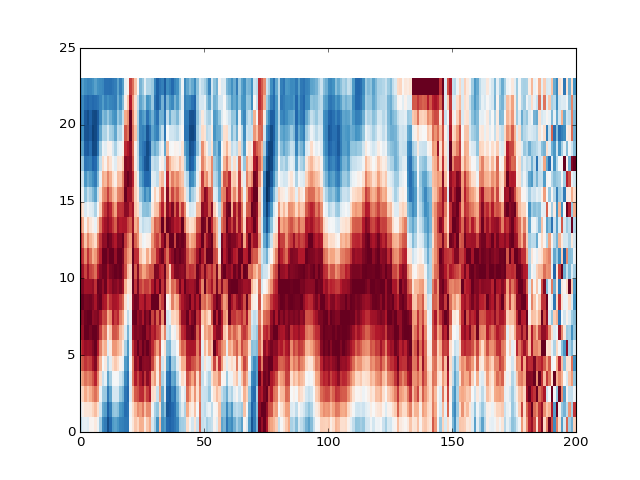

In [32]:
figure()
pcolormesh(ffr/ffr.max(0),cmap=cm.RdBu_r)

In [41]:
row.mmw_frequency.shape

(4665,)

23

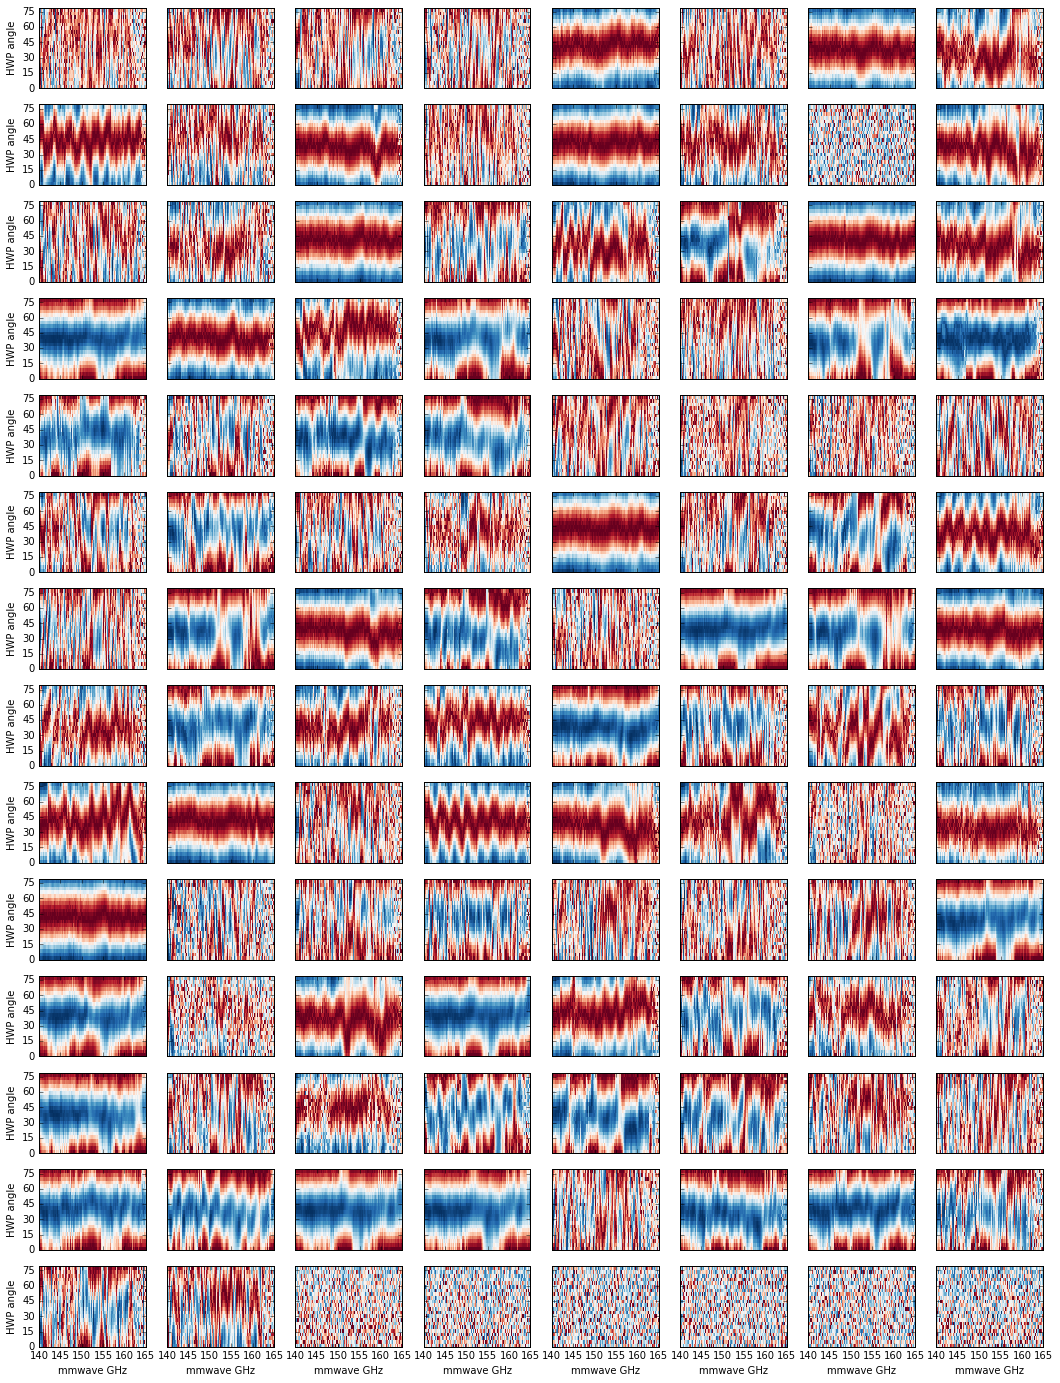

In [46]:
fig,axs = subplots(14,8,figsize=(18,24),sharex=True,sharey=True)
for k,row in df.iterrows():
    if k >=14*8:
        break
    ax = axs.flatten()[k]
    try:
        fr = row.mmw_frequency[:200]/1e9
        angle = np.arange(23)*3.6
        ffr = row.fractional_frequency_response[:23*200].reshape((23,200))
        ax.pcolormesh(fr,angle,ffr/ffr.max(0),cmap=cm.RdBu_r)
        #ax.text(0.1,0.95,("Q: %.1f\nf0: %.1f MHz\nQi: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_i)[()])),
        #       transform=ax.transAxes,size='small',va='top')
    except ValueError,e:
        print e
    ax.set_ylim(0,angle.max())
    ax.set_xlim(fr.min(),fr.max())
    #ax.grid()
for r in range(axs.shape[0]):
    for c in range(axs.shape[1]):
        ax = axs[r,c]
        if r != axs.shape[0]-1:
            pass
        else:
            ax.xaxis.set_major_locator(plt.MultipleLocator(5))
            ax.set_xlabel("mmwave GHz")
        if c != 0:
            pass
        else:
            ax.set_ylabel('HWP angle')
            ax.yaxis.set_major_locator(plt.MultipleLocator(15))
    

In [33]:
row.index

Index([                     u'analysis_epoch',
                            u'folded_s21_raw',
                                  u'folded_x',
             u'fractional_frequency_response',
                         u'hittite_frequency',
                         u'hittite_output_on',
                         u'hittite_power_dBm',
                    u'hwp_motor_index_switch',
                           u'hwp_motor_steps',
                 u'lockin_detection_harmonic',
                     u'lockin_identification',
                u'lockin_input_configuration',
                     u'lockin_input_coupling',
                 u'lockin_input_notch_filter',
             u'lockin_input_shield_grounding',
                              u'lockin_local',
                u'lockin_output_filter_slope',
                u'lockin_reference_frequency',
                    u'lockin_reference_phase',
                   u'lockin_reference_source',
                  u'lockin_reference_trigger',
             

In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


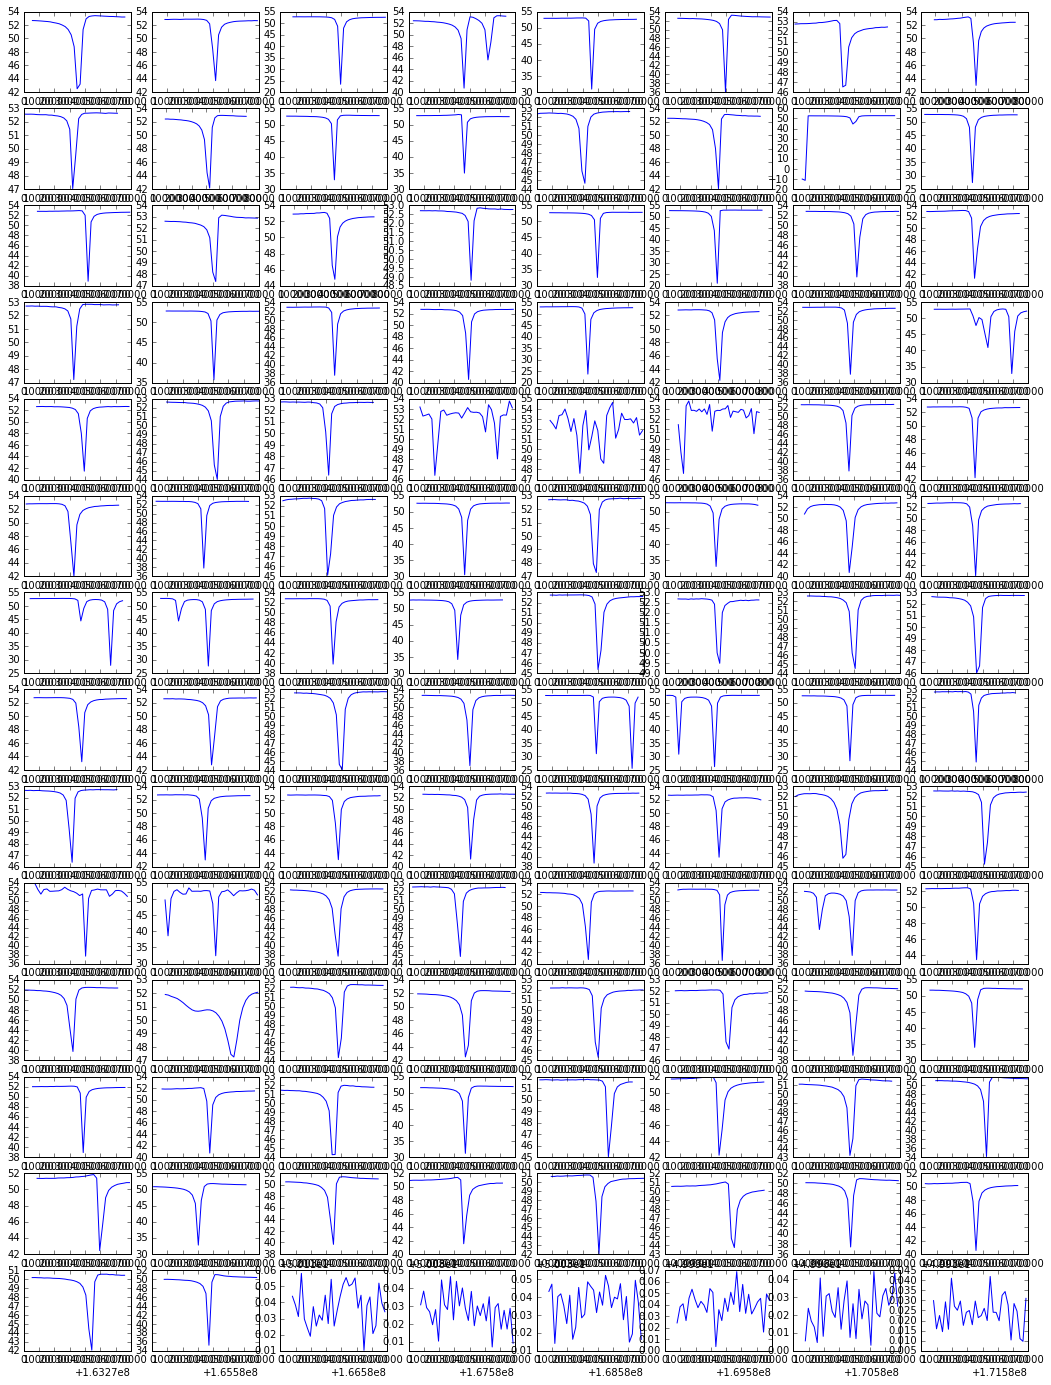

In [39]:
fig,axs = subplots(14,8,figsize=(18,24))#,sharex=True,sharey=True)
for k,row in df.iterrows():
    if k >=14*8:
        break
    ax = axs.flatten()[k]
    ax.plot(row.res_frequency_data,dB(row.res_s21_data))

###  Now fold the two rotations and normalize to the peak
  * Some variation visible between the two rotations, mostly near peaks


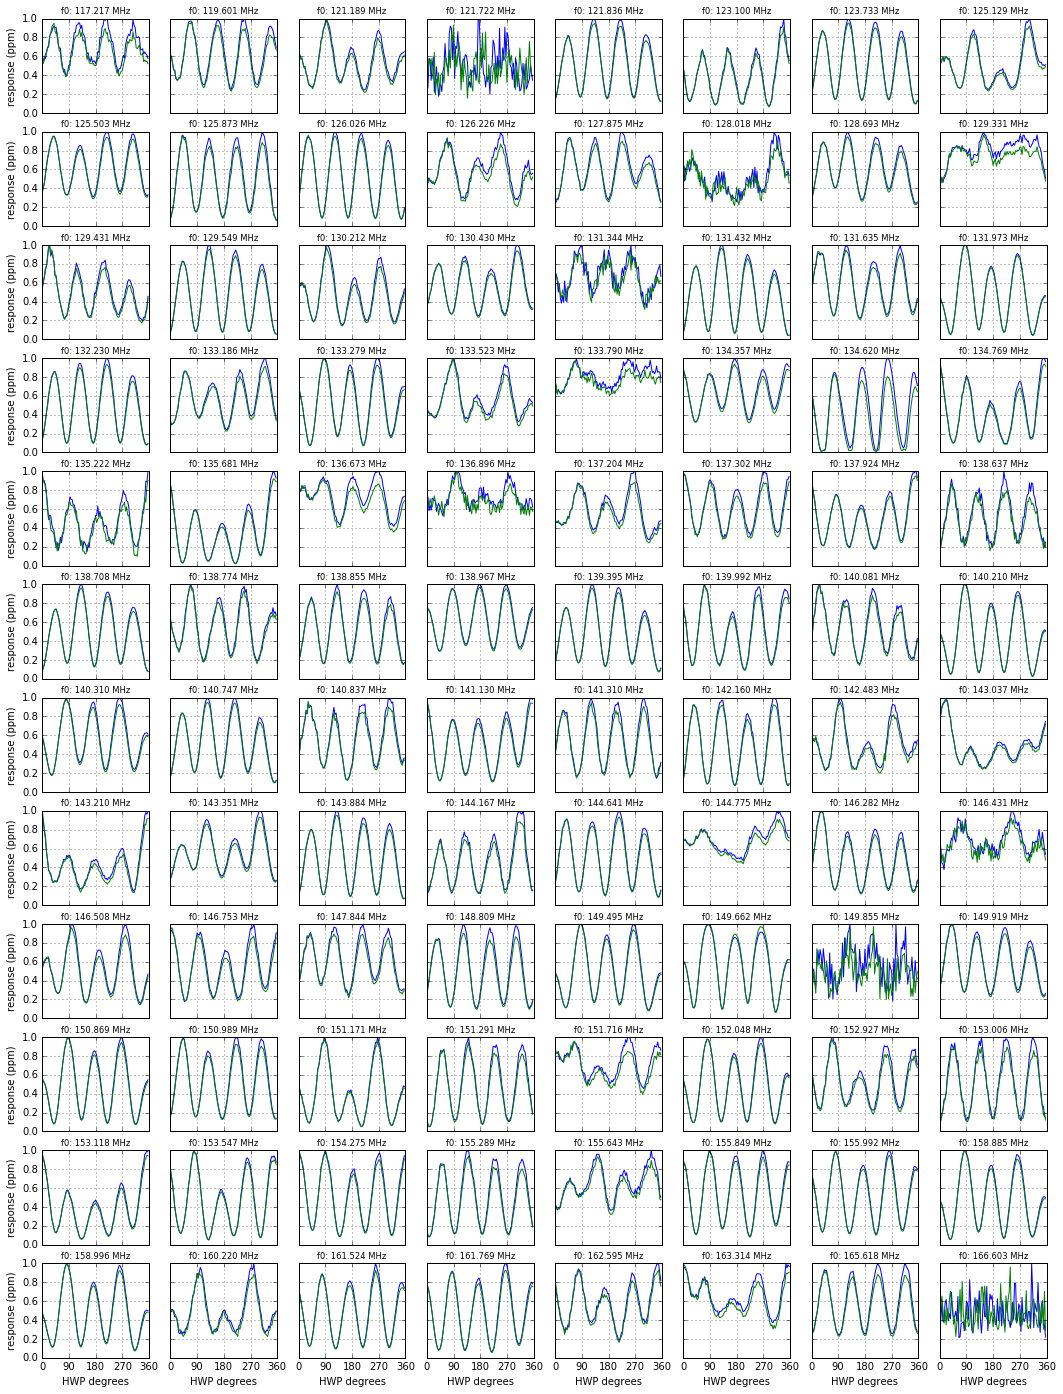

In [50]:
fig,axs = subplots(12,8,figsize=(18,24),sharex=True,sharey=True)
for k,row in df.iterrows():
    if k >=96:
        break
    ax = axs.flatten()[k]
    try:
        ffr = row.fractional_frequency_response.reshape((2,100))
        
        ax.plot(np.arange(100)*3.6,ffr.T/ffr.max())
        ax.set_title(("f0: %.3f MHz" %(row.res_f_0/1e6)),size='small')
        ax.set_xlim(0,360)
        ax.grid()
    except ValueError:
        pass
#    ax.set_ylim(-1,30)
for r in range(axs.shape[0]):
    for c in range(axs.shape[1]):
        ax = axs[r,c]
        if r != axs.shape[0]-1:
            pass
        else:
            ax.xaxis.set_major_locator(plt.MultipleLocator(90))
            ax.set_xlabel("HWP degrees")
        if c != 0:
            pass
        else:
            ax.set_ylabel('response (ppm)')

In [56]:
rcParams['font.size']=18

### All detectors on one plot

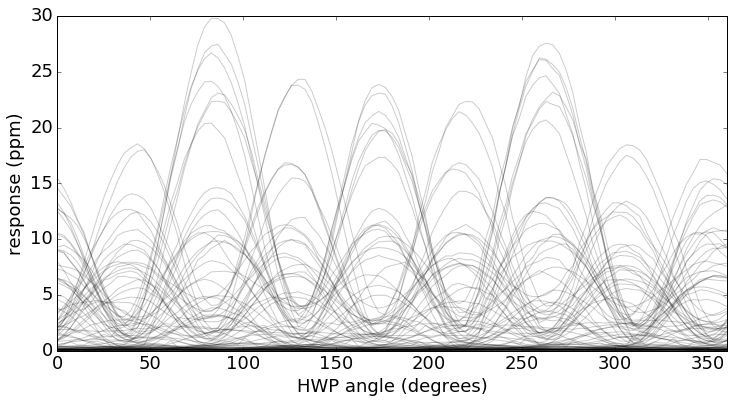

In [58]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    if k > 95:
        break
    try:
        plot(np.arange(200)*3.6,1e6*row.fractional_frequency_response,'k',alpha=.2)
    except ValueError:
        pass
ylim(.01,30)
xlim(0,360)
ylabel('response (ppm)')
xlabel('HWP angle (degrees)')

### All detectors on one plot, peak normalized

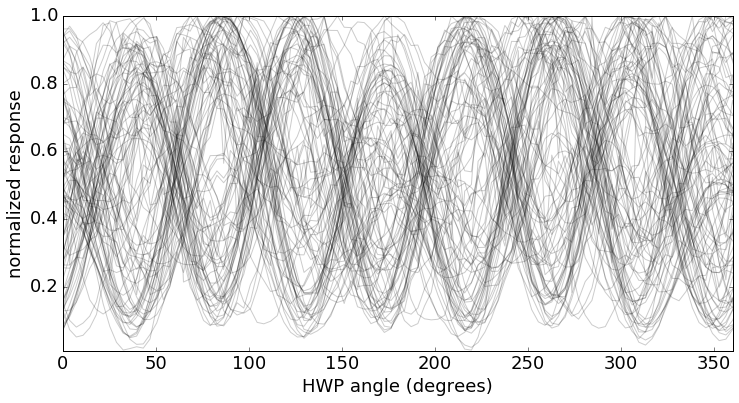

In [61]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    if k > 95:
        break
    try:
        plot(np.arange(200)*3.6,row.fractional_frequency_response/row.fractional_frequency_response.max(),'k',alpha=.2)
    except ValueError:
        pass
ylim(.01,1)
xlim(0,360)
ylabel('normalized response')
xlabel('HWP angle (degrees)')

### All detectors on one plot, peak normalized, log scale

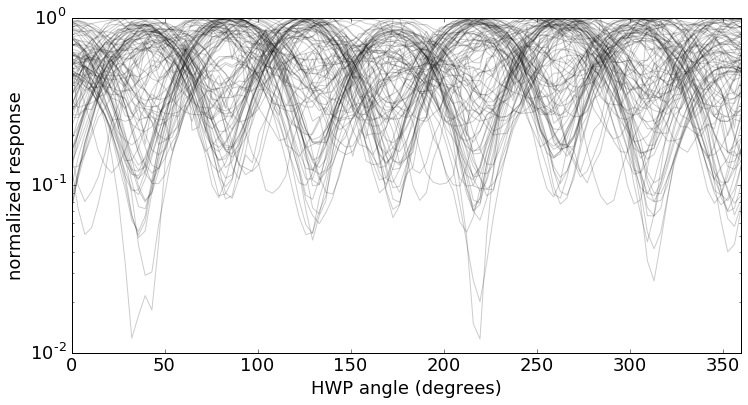

In [62]:
figure(figsize=(12,6))
for k,row in df.iterrows():
    if k > 95:
        break
    try:
        semilogy(np.arange(200)*3.6,row.fractional_frequency_response/row.fractional_frequency_response.max(),'k',alpha=.2)
    except ValueError:
        pass
ylim(.01,1)
xlim(0,360)
ylabel('normalized response')
xlabel('HWP angle (degrees)')

In [24]:
ffrs = np.array([row.fractional_frequency_response for k,row in df.iterrows()])

In [25]:
ffrs.shape

(128, 200)

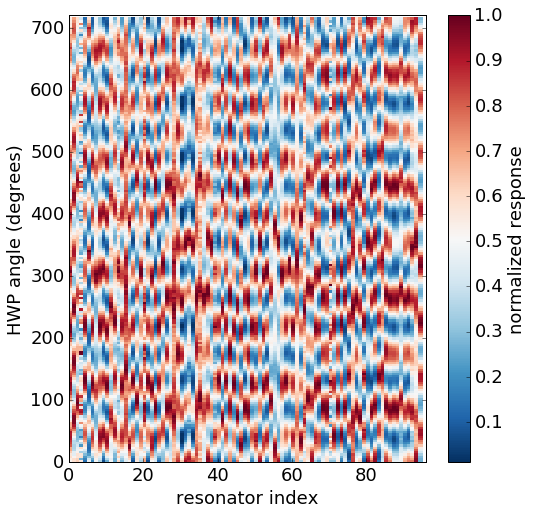

In [72]:
figure(figsize=(8,8))
pcolormesh(np.arange(96),np.arange(200)*3.6,(ffrs.T/ffrs.max(1))[:,:96],cmap=cm.RdBu_r)
cb = colorbar()
cb.set_label('normalized response')
xlim(0,96)
ylim(0,720)
xlabel('resonator index')
ylabel('HWP angle (degrees)')
